In [49]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

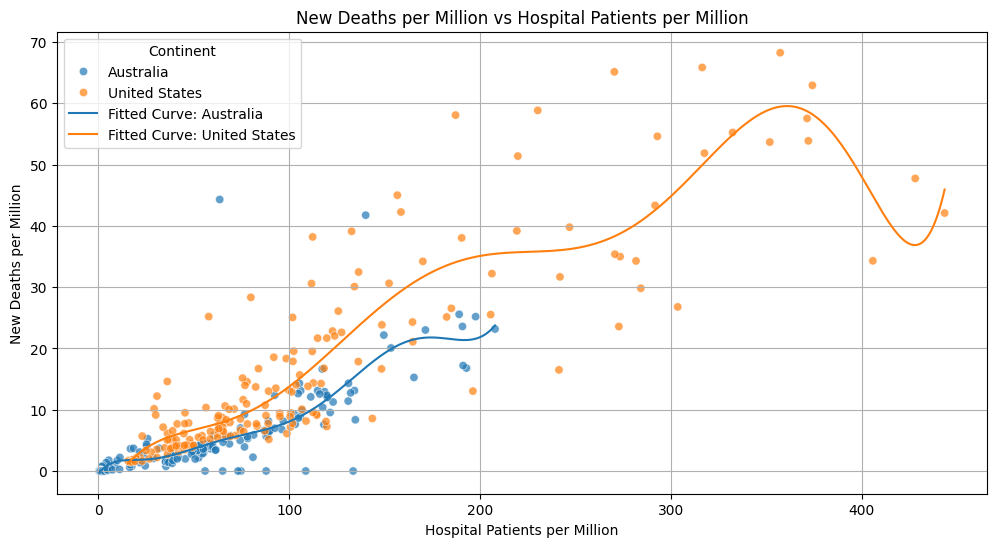

In [50]:
covid_data = pd.read_csv("owid-covid-data.csv")

countries = ['Australia', 'United States']
df = covid_data[covid_data['location'].isin(countries)]

df = df[(df['new_deaths_per_million'].notna()) &
                     (df['hosp_patients_per_million'].notna()) &
                     (df['excess_mortality_cumulative_per_million'].notna())]


# Plot new_deaths_per_million vs hosp_patients_per_million
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='hosp_patients_per_million',
    y='new_deaths_per_million',
    hue='location', 
    alpha=0.7
)
# Fit and overlay a curve for each location
for location in countries:
    location_data = df[(df['location'] == location)]
    x = location_data['hosp_patients_per_million']
    y = location_data['new_deaths_per_million']
    
    # Fit a polynomial curve (degree 2)
    coefficients = np.polyfit(x, y, deg=8)
    polynomial = np.poly1d(coefficients)
    
    # Generate smooth line for the fitted curve
    x_fit = np.linspace(x.min(), x.max(), 500)
    y_fit = polynomial(x_fit)
    
    # Overlay the curve
    plt.plot(x_fit, y_fit, label=f'Fitted Curve: {location}')
plt.title("New Deaths per Million vs Hospital Patients per Million")
plt.xlabel("Hospital Patients per Million")
plt.ylabel("New Deaths per Million")
plt.legend(title='Continent')
plt.grid(True)
plt.show()

In [51]:
df = pd.read_csv("owid-covid-data.csv")
df = df[(df['new_deaths_per_million'].notna()) &
                     (df['hosp_patients_per_million'].notna()) &
                     (df['excess_mortality_cumulative_per_million'].notna())]
print(df['location'].unique())

['Australia' 'Austria' 'Belgium' 'Bolivia' 'Bulgaria' 'Canada' 'Croatia'
 'Cyprus' 'Czechia' 'Denmark' 'Estonia' 'Finland' 'France' 'Ireland'
 'Israel' 'Italy' 'Japan' 'Liechtenstein' 'Lithuania' 'Luxembourg'
 'Malaysia' 'Netherlands' 'Norway' 'Poland' 'Portugal' 'Romania' 'Serbia'
 'Slovakia' 'Slovenia' 'South Africa' 'South Korea' 'Spain' 'Sweden'
 'Switzerland' 'United Kingdom' 'United States']


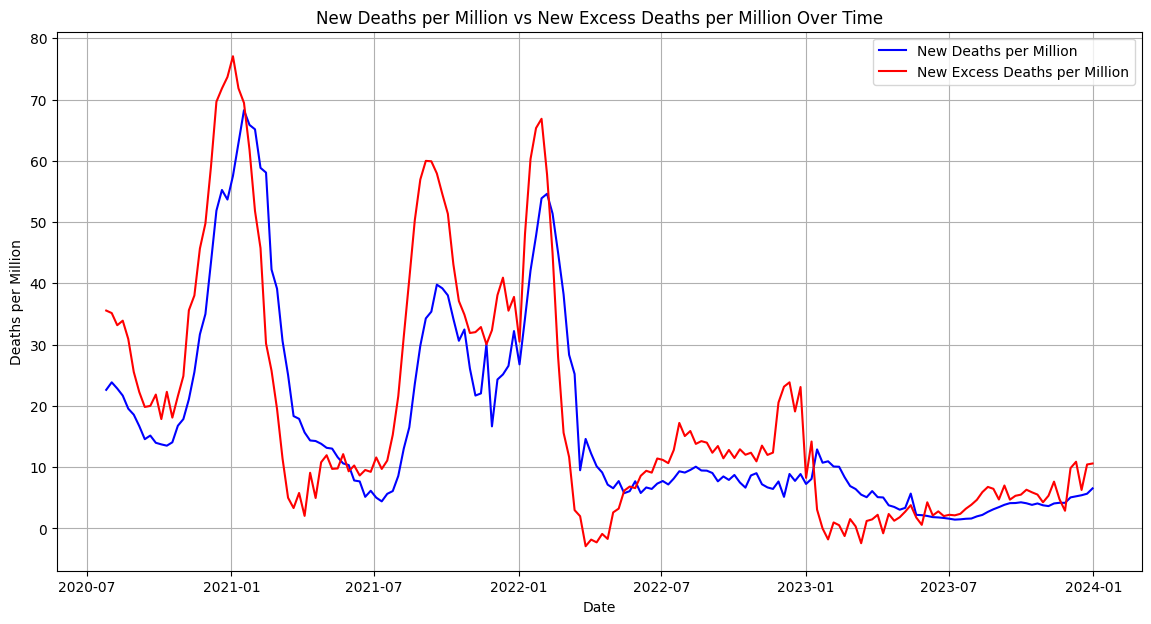

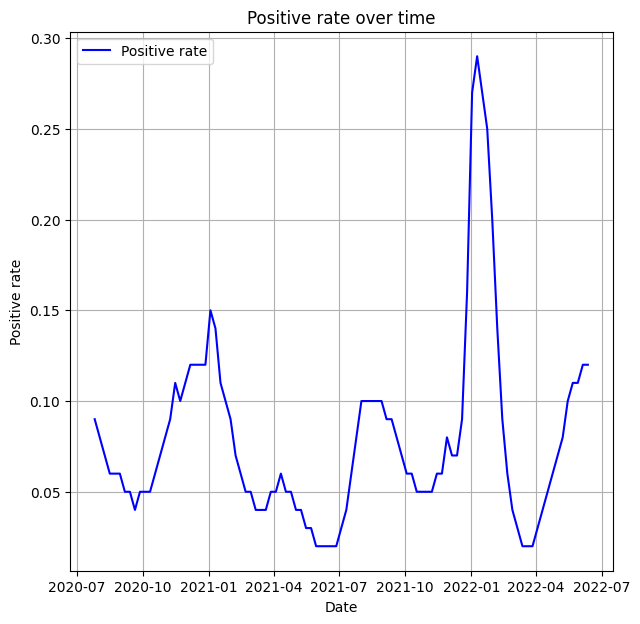

In [58]:
# Load the dataset (replace 'path_to_csv_file' with the actual path to your dataset)
countries = ["United States", 'Australia']
data = covid_data[covid_data['location'].isin(countries)]

data = data[(data['new_deaths_per_million'].notna()) &
                     (data['hosp_patients_per_million'].notna()) &
                     (data['excess_mortality_cumulative_per_million'].notna())]
# Ensure date is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Sort values by location and date for consistent time series calculations
data = data.sort_values(by=['location', 'date'])

# Calculate new excess deaths per million (differentiating cumulative values)
data['new_excess_deaths_per_million'] = data.groupby('location')['excess_mortality_cumulative_per_million'].diff()

# Filter data to include non-NaN values for the required columns
filtered_data = data[(data['new_deaths_per_million'].notna()) &
                     (data['new_excess_deaths_per_million'].notna())]

# Filter for a specific location (e.g., 'World' or any country of interest)
location_data = filtered_data[filtered_data['location'] == 'United States']  # Change 'World' to your location of interest

# Plot the time series
plt.figure(figsize=(14, 7))
plt.plot(location_data['date'], location_data['new_deaths_per_million'], label='New Deaths per Million', color='blue')
plt.plot(location_data['date'], location_data['new_excess_deaths_per_million'], label='New Excess Deaths per Million', color='red')
plt.title('New Deaths per Million vs New Excess Deaths per Million Over Time')
plt.xlabel('Date')
plt.ylabel('Deaths per Million')
plt.legend()
plt.grid(True)
plt.show()

# Plot positive rate vs. date
filtered_data = location_data[(location_data['positive_rate'].notna())]

plt.figure(figsize=(7, 7))
plt.plot(filtered_data['date'], filtered_data['positive_rate'], label='Positive rate', color='blue')
plt.title('Positive rate over time')
plt.xlabel('Date')
plt.ylabel('Positive rate')
plt.legend()
plt.grid(True)
plt.show()


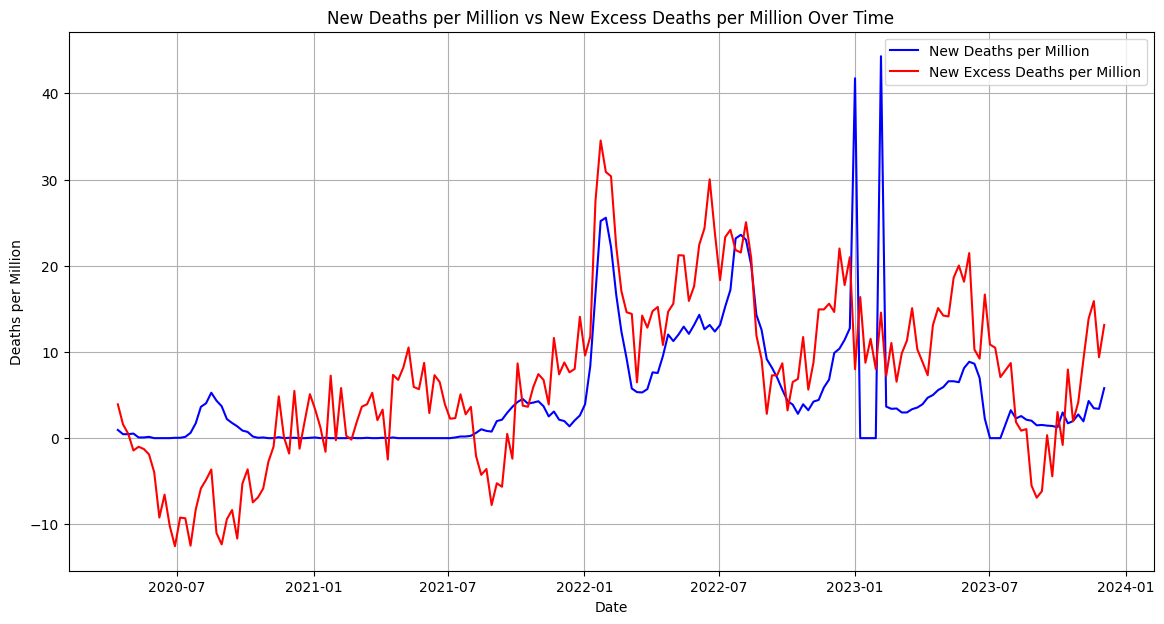

In [53]:
# Filter for a specific location (e.g., 'World' or any country of interest)
location_data = filtered_data[filtered_data['location'] == 'Australia']  # Change 'World' to your location of interest

# Plot the time series
plt.figure(figsize=(14, 7))
plt.plot(location_data['date'], location_data['new_deaths_per_million'], label='New Deaths per Million', color='blue')
plt.plot(location_data['date'], location_data['new_excess_deaths_per_million'], label='New Excess Deaths per Million', color='red')
plt.title('New Deaths per Million vs New Excess Deaths per Million Over Time')
plt.xlabel('Date')
plt.ylabel('Deaths per Million')
plt.legend()
plt.grid(True)

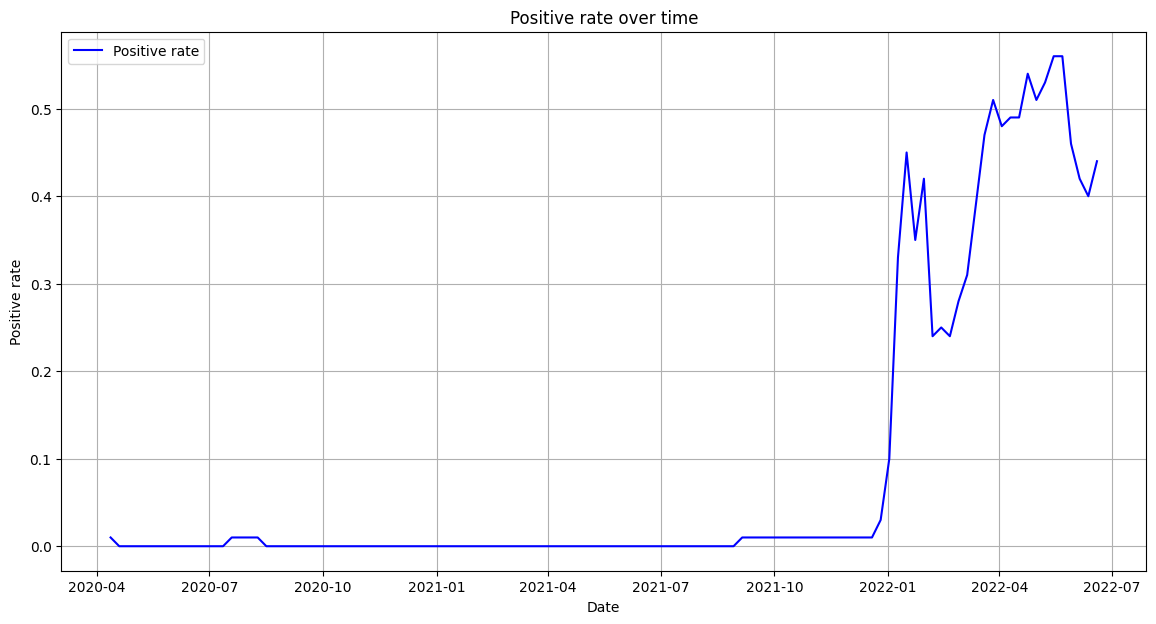

In [55]:
# Plot positive rate vs. date
filtered_data = location_data[(location_data['positive_rate'].notna())]

plt.figure(figsize=(14, 7))
plt.plot(filtered_data['date'], filtered_data['positive_rate'], label='Positive rate', color='blue')
plt.title('Positive rate over time')
plt.xlabel('Date')
plt.ylabel('Positive rate')
plt.legend()
plt.grid(True)
plt.show()


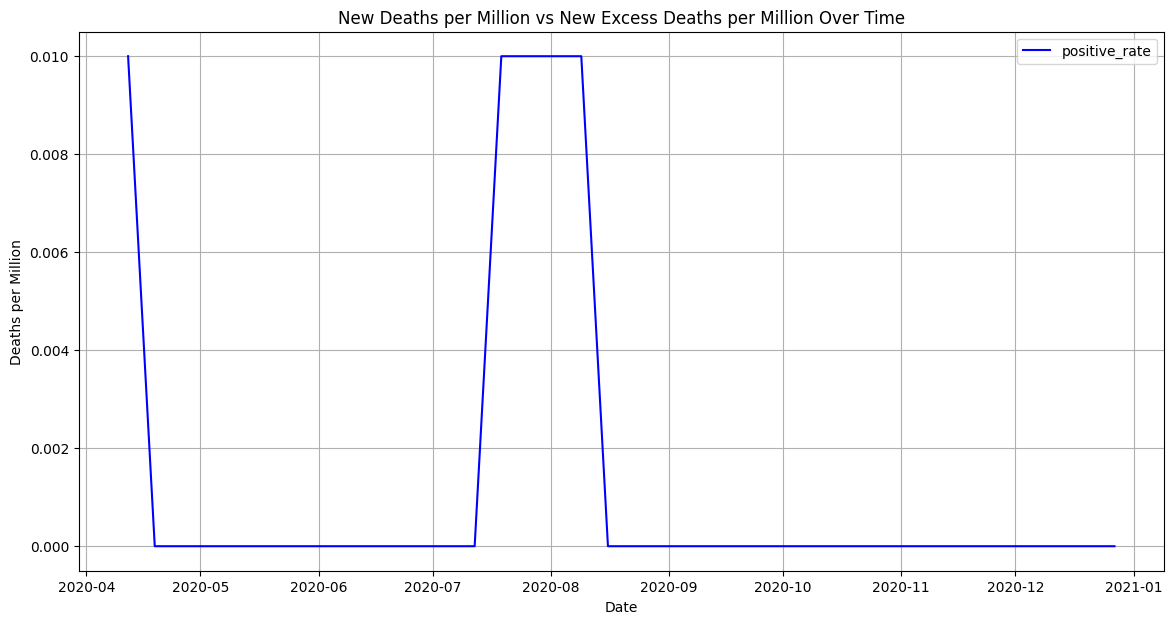

In [54]:
# Plot positive rate vs. date
filtered_data = location_data[
                     (location_data['positive_rate'].notna()) & 
                     (location_data['date'] < pd.Timestamp('2021-01-01'))]

plt.figure(figsize=(14, 7))
plt.plot(filtered_data['date'], filtered_data['positive_rate'], label='positive_rate', color='blue')
plt.title('New Deaths per Million vs New Excess Deaths per Million Over Time')
plt.xlabel('Date')
plt.ylabel('Deaths per Million')
plt.legend()
plt.grid(True)
plt.show()
